## **1. Data Acquitition**

In [ ]:
# install library kaggle
!pip install -q kaggle

In [ ]:
# upload kaggle.json yang sudah di download
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadrafiqpohan","key":"14e22861a7d40105acc33ff2c220bc21"}'}

In [ ]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
# download Dataset
!kaggle datasets download -d jocelyndumlao/good-and-bad-classification-of-fresh-carrot

Dataset URL: https://www.kaggle.com/datasets/jocelyndumlao/good-and-bad-classification-of-fresh-carrot
License(s): CC0-1.0


In [ ]:
# unzip dataset
!unzip good-and-bad-classification-of-fresh-carrot

Archive:  good-and-bad-classification-of-fresh-carrot.zip
  inflating: Good and bad classification of Fresh CARROT/CARROT/BAD/IMG-20250215-WA0000 (1) (1)-9h02Qh.jpg  
  inflating: Good and bad classification of Fresh CARROT/CARROT/BAD/IMG-20250215-WA0000 (1) (1)-HzixcC.jpg  
  inflating: Good and bad classification of Fresh CARROT/CARROT/BAD/IMG-20250215-WA0000 (1) (1)-JkdvTx.jpg  
  inflating: Good and bad classification of Fresh CARROT/CARROT/BAD/IMG-20250215-WA0000 (1) (1)-RYFeUj.jpg  
  inflating: Good and bad classification of Fresh CARROT/CARROT/BAD/IMG-20250215-WA0000 (1) (1)-b7kCjM.jpg  
  inflating: Good and bad classification of Fresh CARROT/CARROT/BAD/IMG-20250215-WA0000 (1) (1)-dm7Wbf.jpg  
  inflating: Good and bad classification of Fresh CARROT/CARROT/BAD/IMG-20250215-WA0000 (1) (1)-jTAGgA.jpg  
  inflating: Good and bad classification of Fresh CARROT/CARROT/BAD/IMG-20250215-WA0000 (1) (1)-smHt0Q.jpg  
  inflating: Good and bad classification of Fresh CARROT/CARROT/BAD/IM

In [ ]:
# !rm -rf /content/data_split

# **2. Data Preparation**

In [ ]:
# Memisahkan data training, testing, dan validasi
import os
import shutil
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

original_data_dir = '/content/Good and bad classification of Fresh CARROT/CARROT'
base_dir = 'data_split'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Buat folder target
for directory in [train_dir, val_dir, test_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Bagi data tiap kelas ke train/val/test
for class_name in os.listdir(original_data_dir):
    class_path = os.path.join(original_data_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    # images = [img for img in images if img.endswith(('jpg', 'jpeg', 'png'))]
    images = [img for img in images]

    train_imgs, temp_imgs = train_test_split(images, test_size=0.2, random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.5, random_state=42)

    for img_set, folder in zip([train_imgs, val_imgs, test_imgs], [train_dir, val_dir, test_dir]):
        class_folder = os.path.join(folder, class_name)
        os.makedirs(class_folder, exist_ok=True)
        for img in img_set:
            src = os.path.join(class_path, img)
            dst = os.path.join(class_folder, img)
            shutil.copy(src, dst)

print("✅ Data splitting selesai.")

✅ Data splitting selesai.


In [ ]:
# Menampilkan jumlah data pada setiap pembagian data
from collections import defaultdict

def count_images_per_class(data_dir):
    class_counts = defaultdict(int)
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            # num_images = len([img for img in os.listdir(class_path) if img.endswith(('jpg', 'jpeg', 'png'))])
            num_images = len([img for img in os.listdir(class_path)])
            class_counts[class_name] = num_images
    return class_counts

# Tampilkan jumlah data per kelas untuk masing-masing set
print("📊 Jumlah data per kelas:")
print("\n[TRAIN]")
train_counts = count_images_per_class(train_dir)
for k, v in train_counts.items():
    print(f"{k}: {v} gambar")

print("\n[VALIDASI]")
val_counts = count_images_per_class(val_dir)
for k, v in val_counts.items():
    print(f"{k}: {v} gambar")

print("\n[TESTING]")
test_counts = count_images_per_class(test_dir)
for k, v in test_counts.items():
    print(f"{k}: {v} gambar")

📊 Jumlah data per kelas:

[TRAIN]
BAD: 440 gambar
GOOD: 421 gambar

[VALIDASI]
BAD: 55 gambar
GOOD: 53 gambar

[TESTING]
BAD: 55 gambar
GOOD: 53 gambar


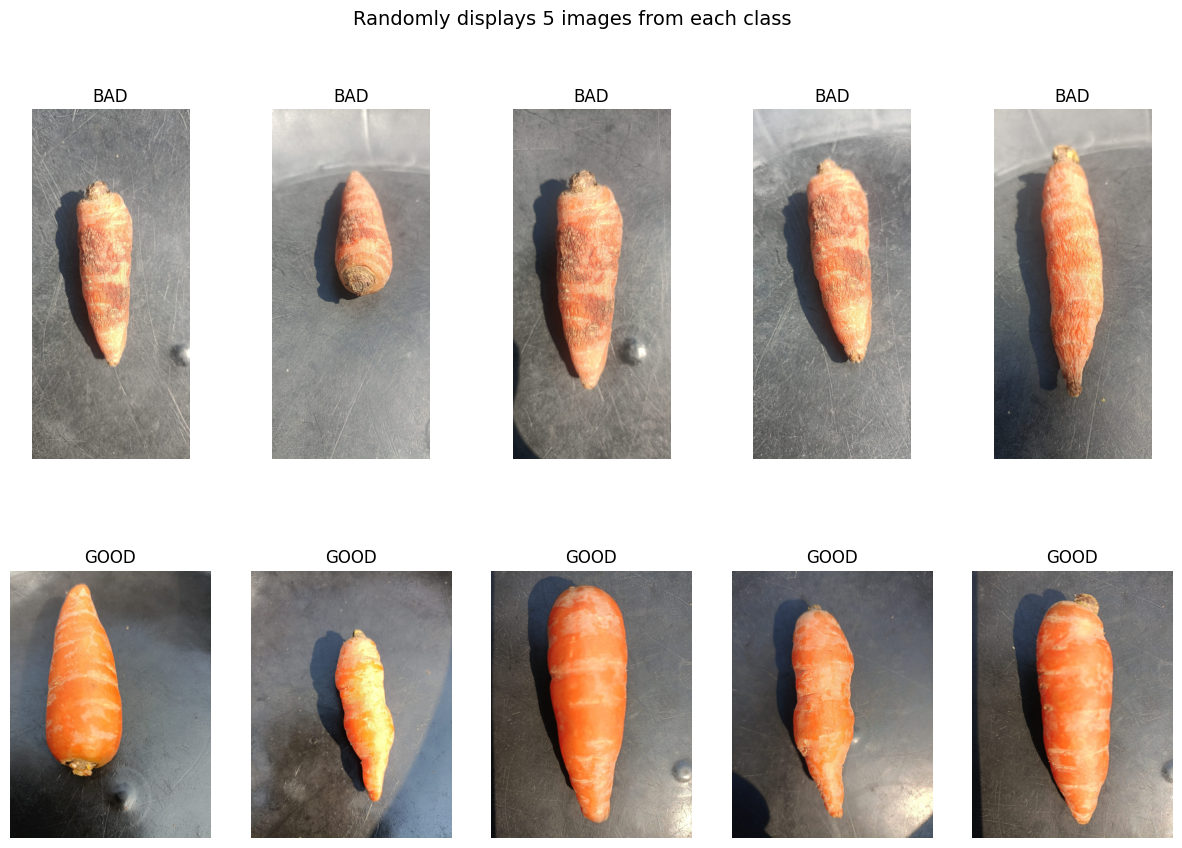

In [ ]:
import random
import matplotlib.pyplot as plt

# Direktori utama data gambar
data_dir = '/content/data_split/train'

# List nama kelas
class_names = os.listdir(data_dir)

# Membuat subplot dengan 5 kolom (1 kolom untuk setiap kelas)
fig, axes = plt.subplots(len(class_names), 5, figsize=(15, 10))
fig.suptitle("Randomly displays 5 images from each class", fontsize=14)

for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    class_images = os.listdir(class_dir)

    # Memilih secara acak 5 gambar dari setiap kelas
    selected_images = random.sample(class_images, 5)

    # Menampilkan gambar-gambar yang dipilih
    for j, image_filename in enumerate(selected_images):
        img = plt.imread(os.path.join(class_dir, image_filename))
        axes[i, j].imshow(img)
        axes[i, j].set_title(class_name)
        axes[i, j].axis('off')

# Menghilangkan grid yang tidak terpakai (jika ada)
for i in range(len(class_names)):
    for j in range(5, len(selected_images)):
        axes[i, j].axis('off')

plt.show()

# **3. Data Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    # rotation_range=30,
    # zoom_range=0.15,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.15,
    # horizontal_flip=True,
    # vertical_flip=True,
    fill_mode="nearest",
    # fill_mode="constant",
    # cval=0,
    brightness_range=[1.2, 1.6]
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    # shuffle=42
)

Found 861 images belonging to 2 classes.
Found 108 images belonging to 2 classes.
Found 108 images belonging to 2 classes.


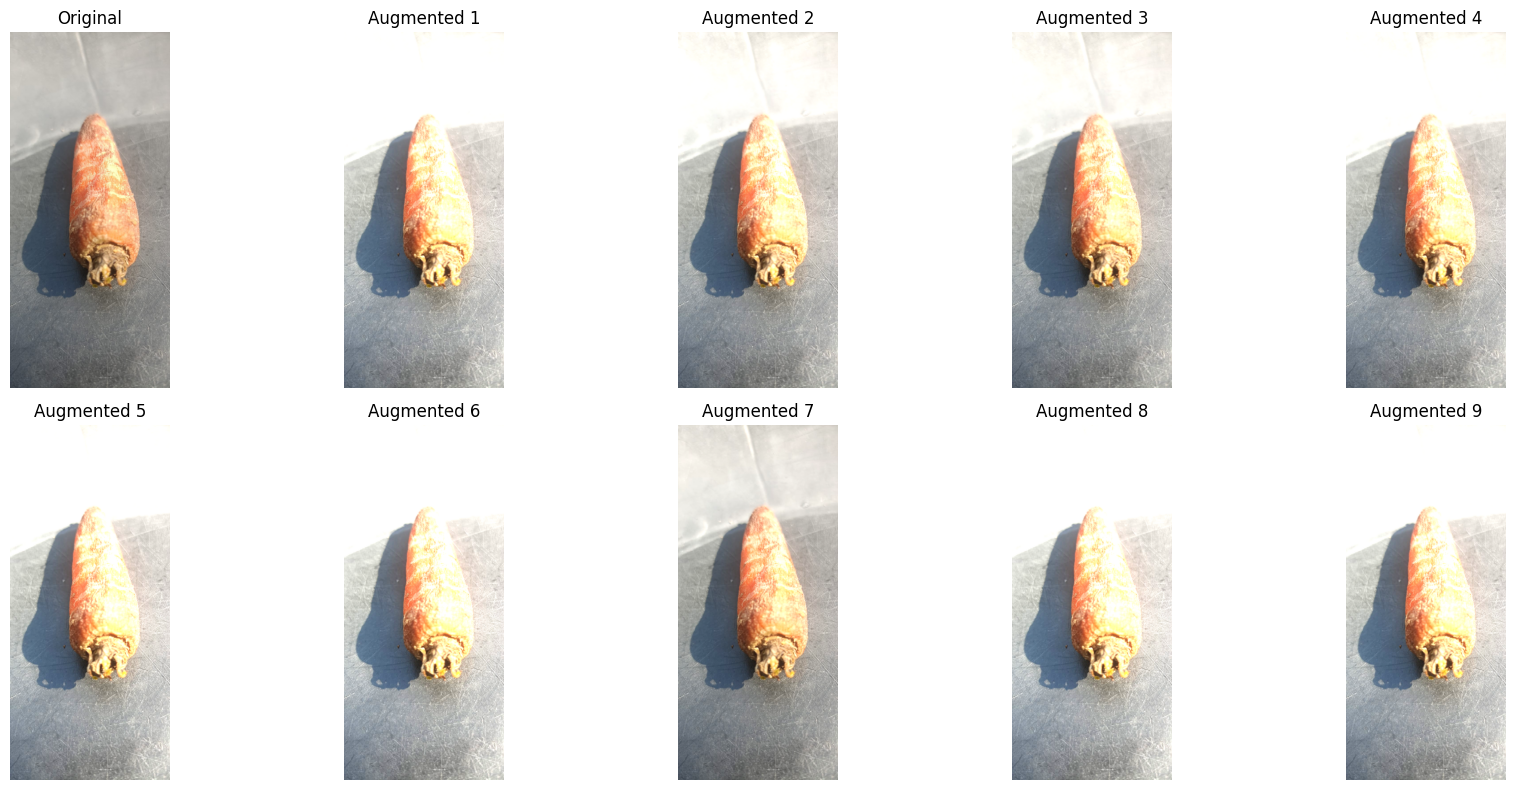

In [ ]:
# Visualisasi hasil augmentasi
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
# import random

# Direktori data training
data_dir = train_dir

# List nama kelas yang tersedia di direktori training
class_names = os.listdir(data_dir)
class_names = [name for name in class_names if os.path.isdir(os.path.join(data_dir, name))]

if not class_names:
    print("❌ Tidak ada direktori kelas ditemukan di", train_dir)
else:
    # Memilih satu kelas secara acak
    selected_class = random.choice(class_names)

    # Mendapatkan daftar gambar dari kelas yang dipilih
    class_dir = os.path.join(data_dir, selected_class)
    class_images = os.listdir(class_dir)
    class_images = [img for img in class_images] # Memastikan hanya file gambar

    if not class_images:
        print(f"❌ Tidak ada gambar ditemukan di direktori kelas: {selected_class}")
    else:
        # Memilih secara acak satu gambar dari kelas yang dipilih
        selected_image = random.choice(class_images)

        # Memuat gambar dan mengonversi menjadi larik numpy
        img_path = os.path.join(class_dir, selected_image)
        try:
            img = plt.imread(img_path)
            img_array = img_to_array(img)
            img_array = img_array.reshape((1,) + img_array.shape)  # Mengubah dimensi menjadi (1, height, width, channels)

            # Menghasilkan augmented images
            augmented_images = []
            for batch in train_datagen.flow(img_array, batch_size=1):
                augmented_images.append(array_to_img(batch[0]))
                if len(augmented_images) >= 9:  # Menampilkan 9 variasi augmentasi
                    break

            # Tampilkan dalam grid 2x5
            plt.figure(figsize=(18, 8))
            # Gambar asli
            plt.subplot(2, 5, 1)
            plt.imshow(img)
            plt.title("Original", fontsize=12)
            plt.axis('off')

            # Gambar hasil augmentasi
            for i, augmented_img in enumerate(augmented_images):
                plt.subplot(2, 5, i+2)
                plt.imshow(augmented_img)
                plt.title(f"Augmented {i+1}", fontsize=12)
                plt.axis('off')

            plt.tight_layout()
            plt.show()

        except FileNotFoundError:
            print(f"❌ File tidak ditemukan: {img_path}")
        except Exception as e:
            print(f"❌ Terjadi kesalahan saat memproses gambar: {e}")

# **4. Pemodelan**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3

# Membuat model dasar InceptionV3 (pre-trained) tanpa lapisan klasifikasi teratas
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Menetapkan lapisan-lapisan dalam model dasar sebagai non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Membangun model Anda dengan menambahkan lapisan-lapisan klasifikasi kustom
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# mendefinisikan callback Early Stopping dan Model Chekpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#  Early Stopping akan menghentikan pelatihan lebih awal jika kriteria tertentu tidak terpenuhi
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",         # Mengindikasikan metrik yang akan diamati selama pelatihan model
    min_delta=0.001,            # Nilai minimum perubahan yang harus terjadi dalam metrik yang diamati agar pelatihan tetap berlanjut
    patience=5,                 # Berapa banyak epoch yang harus berlalu tanpa ada peningkatan sebelum pelatihan dihentikan
    mode="auto",
    verbose=1,
    baseline=None,
    restore_best_weights=True   # Model akan dikembalikan ke bobot terbaik yang telah dicapai selama pelatihan sebelum dihentikan
)

# Model Chekpoint akan menyimpan bobot terbaik selama pelatihan
checkpoint_path = 'model_checkpoints/best_model.weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',         # metrik yang akan diamati saat menyimpan bobot
    mode='min',
    save_best_only=True,        # menyimpan bobot model terbaik berdasarkan metrik yang diamati
    save_weights_only=True,
    verbose=1
)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001), #1e-4
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,852,898 (87.18 MB)

 Trainable params: 1,050,114 (4.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 909ms/step - accuracy: 0.7665 - loss: 2.1688
Epoch 1: val_loss improved from inf to 0.21886, saving model to model_checkpoints/best_model.weights.h5
27/27 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.7710 - loss: 2.1248 - val_accuracy: 0.9444 - val_loss: 0.2189
Epoch 2/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 604ms/step - accuracy: 0.9550 - loss: 0.2833
Epoch 2: val_loss improved from 0.21886 to 0.02055, saving model to model_checkpoints/best_model.weights.h5
27/27 ━━━━━━━━━━━━━━━━━━━━ 50s 715ms/step - accuracy: 0.9548 - loss: 0.2846 - val_accuracy: 0.9815 - val_loss: 0.0205
Epoch 3/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 613ms/step - accuracy: 1.0000 - loss: 0.0028
Epoch 3: val_loss did not improve from 0.02055
27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 716ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9815 - val_loss: 0.0235
Epoch 4/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step - accuracy: 0.9942 - loss: 0.0616
Epoch 4: val_loss improved from 0.02055 to 0.0

# **5. Evaluasi**

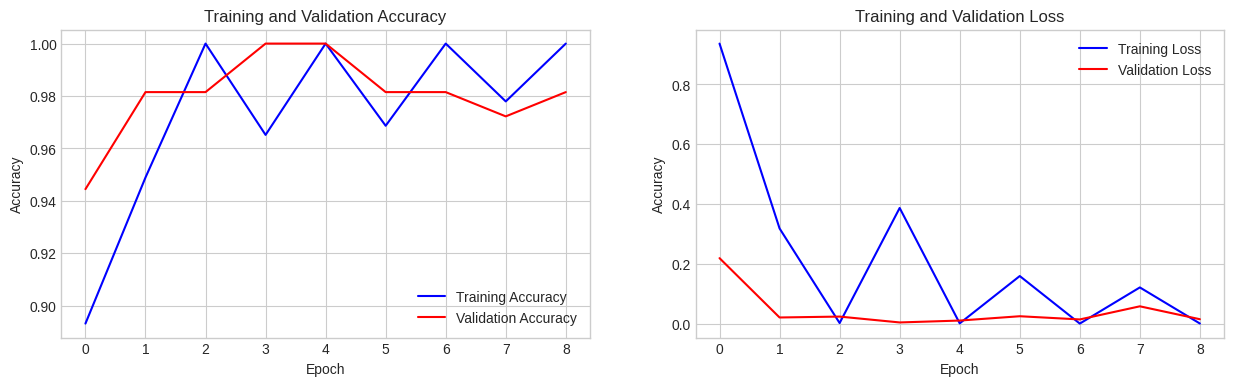

In [ ]:
# plotting hasil training
plt.style.use('seaborn-v0_8-whitegrid')

def plot_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plt.subplot(1, 2, 1)
  acc_plot, = plt.plot(epochs, acc, 'b')
  val_acc_plot, = plt.plot(epochs, val_acc, 'r')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

def plot_loss(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plt.subplot(1, 2, 2)
  loss_plot, = plt.plot(epochs, loss, 'b')
  val_loss_plot, = plt.plot(epochs, val_loss, 'r')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

def plot_history(history):
  plt.figure(figsize=(15,4))
  plot_acc(history)
  plot_loss(history)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')

plot_history(history)

In [ ]:
# Load bobot terbaik model
model.load_weights('model_checkpoints/best_model.weights.h5')

In [ ]:
# Evaluasi Model
import pandas as pd

train_result = model.evaluate(train_generator)
val_result = model.evaluate(val_generator)
test_result = model.evaluate(test_generator)

model_result = pd.DataFrame(zip(train_result, val_result, test_result),
                             columns=['Train', 'Validation', 'Testing'],
                             index=['Loss', "Accuracy"])

model_result

27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 759ms/step - accuracy: 1.0000 - loss: 0.0018
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 419ms/step - accuracy: 1.0000 - loss: 0.0036
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 449ms/step - accuracy: 1.0000 - loss: 0.0050


,Train,Validation,Testing
Loss,0.001381,0.003959,0.004775
Accuracy,1.000000,1.000000,1.000000


In [ ]:
# Menampilkan classification report
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Ambil prediksi dari model_resnet
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Ambil label asli
y_true = test_generator.classes

# Label mapping (index ke nama kelas)
class_labels = list(test_generator.class_indices.keys())

# Print classification report
print("\n📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step

📊 Classification Report:

              precision    recall  f1-score   support

         BAD       0.44      0.44      0.44        55
        GOOD       0.42      0.42      0.42        53

    accuracy                           0.43       108
   macro avg       0.43      0.43      0.43       108
weighted avg       0.43      0.43      0.43       108



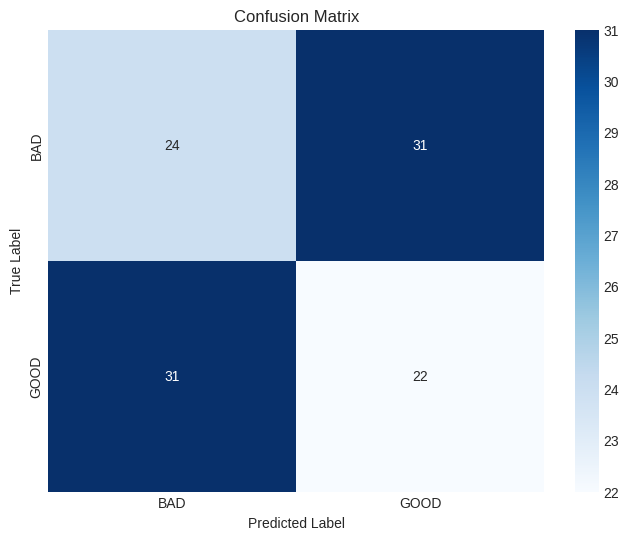

In [ ]:
# Menampilkan confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

✅ Nama kelas berhasil diambil dari train_generator: ['BAD', 'GOOD']


Saving IMG-20250215-WA0002-z10t3p.jpg to IMG-20250215-WA0002-z10t3p.jpg
Gambar 'IMG-20250215-WA0002-z10t3p.jpg' berhasil diunggah.


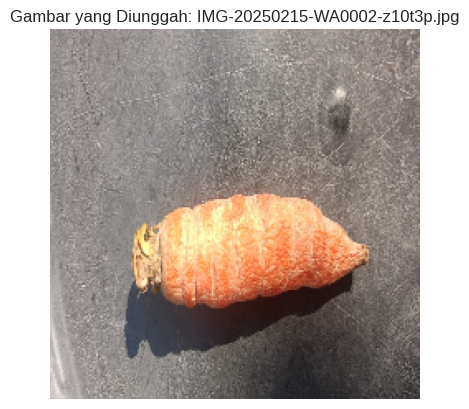

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

=== Hasil Prediksi ===
File Gambar: IMG-20250215-WA0002-z10t3p.jpg
Kelas Prediksi: BAD

Probabilitas Setiap Kelas:
  Images   Probability
0    BAD  9.999990e-01
1   GOOD  9.444605e-07


In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import io
from google.colab import files

# Asumsikan model sudah dimuat/didefinisikan

# fungsi untuk mengklasifikasi gambar (sama seperti sebelumnya)
def predict_image(image_upload, model=None, class_names=None):
    if model is None:
        print("Error: Model belum didefinisikan.")
        return None, None
    if class_names is None:
        print("Error: Nama kelas belum didefinisikan.")
        return None, None

    im = image_upload
    im_array = np.asarray(im)
    im_array = im_array * (1 / 255.0)
    im_input = tf.reshape(im_array, shape=[1, 224, 224, 3])

    predict_array = model.predict(im_input)[0]

    df_predict = pd.DataFrame(predict_array, columns=['Probability'])
    df_predict['Images'] = class_names
    df_predict = df_predict[['Images', 'Probability']]

    predicted_label_index = np.argmax(predict_array)
    predicted_product = class_names[predicted_label_index]

    return predicted_product, df_predict

# Asumsikan model sudah dimuat
try:
    if 'model' not in locals() or model is None:
        model = tf.keras.models.load_model('model_checkpoints/best_model.weights.h5')
        print("✅ Model berhasil dimuat.")
except Exception as e:
    print(f"❌ Gagal memuat model: {e}")
    model = None

# Ambil nama kelas dari train_generator
try:
    if 'train_generator' in locals() and train_generator is not None:
        class_names_from_generator = list(train_generator.class_indices.keys())
        print("✅ Nama kelas berhasil diambil dari train_generator:", class_names_from_generator)

        uploaded = files.upload()

        if uploaded:
            for filename in uploaded.keys():
                print(f"Gambar '{filename}' berhasil diunggah.")

                # Memuat gambar yang diunggah
                uploaded_image = uploaded[filename]
                img = load_img(io.BytesIO(uploaded_image), target_size=(224, 224))
                img_array = img_to_array(img)
                plt.imshow(img)
                plt.title(f"Gambar yang Diunggah: {filename}")
                plt.axis('off')
                plt.show()

                if model is not None:
                    predicted_class, probability_df = predict_image(img_array, model=model, class_names=class_names_from_generator)
                    print("\n=== Hasil Prediksi ===")
                    print("File Gambar:", filename)
                    print("Kelas Prediksi:", predicted_class)
                    print("\nProbabilitas Setiap Kelas:")
                    print(probability_df)
                else:
                    print("\n⚠️ Tidak dapat melakukan prediksi karena model belum dimuat.")
        else:
            print("Tidak ada file yang diunggah.")

    else:
        print("❌ train_generator belum didefinisikan, tidak dapat mengambil nama kelas.")

except NameError:
    print("❌ Variabel train_generator tidak ditemukan.")
except ImportError:
    print("❌ Modul 'google.colab' tidak ditemukan. Pastikan Anda menjalankan kode di Google Colab.")
except Exception as e:
    print(f"❌ Terjadi kesalahan: {e}")